<a href="https://colab.research.google.com/github/pooja251096/airbnb_booking_analysis/blob/main/Copy_of_Airbnb_data_analysis_Pooja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :

1. What can we learn about different hosts and areas?
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?


**Exploratory Data Analysis:**
## To Find relationship between Price and Minimum Nights.

# Import Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [78]:
path = "/content/drive/MyDrive/Almabetter learning/pandas data/Airbnb Eda project data/Airbnb NYC 2019.csv"

In [79]:
df = pd.read_csv(path)

In [80]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [82]:
len(df)

48895

In [83]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [84]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Understanding Data and dealing with missing values


In [85]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [86]:
nhood = df['neighbourhood'].unique()

In [87]:
len(nhood)

221

In [88]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [89]:
#dropping column
df.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [90]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [91]:
df['reviews_per_month'].fillna(0,inplace=True)

In [92]:
df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

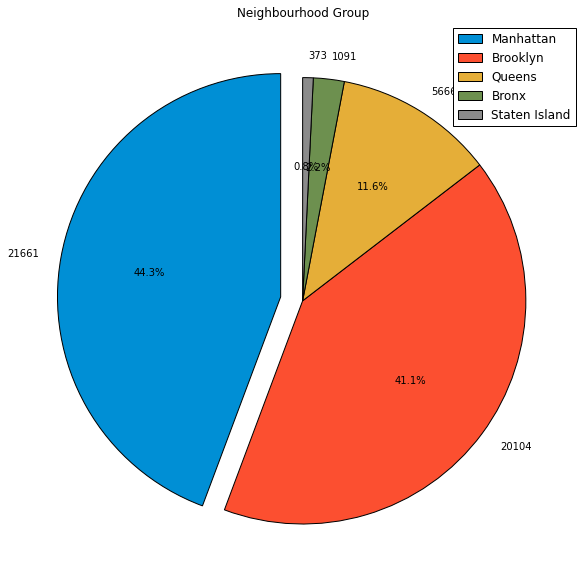

In [93]:
#Visualize the proportion of the listing count on each region area using the ‘neighbourhood_group’ columns

labels = df.neighbourhood_group.value_counts().index
labels
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = df.neighbourhood_group.value_counts().values
shape
plt.figure(figsize=(10,10))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

From the chart above, we see the Manhattan has the most listings with almost 22700 listings number, covering more than 40% of the total listings.


# **Understanding data of Price and minimum nights**


In [94]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [95]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [96]:
df['minimum_nights'].value_counts().reset_index()

,index,minimum_nights
0,1,12720
1,2,11696
2,3,7999
3,30,3760
4,4,3303
...,...,...
104,42,1
105,186,1
106,265,1
107,1000,1


In [97]:
df[['price','minimum_nights']]

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48890,70,2
48891,40,4
48892,115,10
48893,55,1


In [98]:
df[['minimum_nights','price']].describe()

,minimum_nights,price
count,48895.000000,48895.000000
mean,7.029962,152.720687
std,20.510550,240.154170
min,1.000000,0.000000
25%,1.000000,69.000000
50%,3.000000,106.000000
75%,5.000000,175.000000
max,1250.000000,10000.000000


# Calculate average price for minimum nights equal to 1

In [99]:
night1 = df[df['minimum_nights']==1]

In [100]:
night1

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188
17,Chelsea Perfect,18946,Manhattan,Chelsea,40.74192,-73.99501,Private room,140,1,260,2.12,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48878,Room for rest,41326856,Queens,Elmhurst,40.74477,-73.87727,Private room,45,1,0,0.00,5,172
48880,The Raccoon Artist Studio in Williamsburg New ...,208514239,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0.00,3,365
48887,Garden Jewel Apartment in Williamsburg New York,208514239,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,0.00,3,365
48889,QUIT PRIVATE HOUSE,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,0.00,2,163


In [101]:
avg_price_per_night = night1['price'].mean()

In [102]:
avg_price_per_night

142.02287735849058

In [103]:
night1['price']

0        149
1        225
3         89
9        150
17       140
        ... 
48878     45
48880    120
48887    170
48889     65
48893     55
Name: price, Length: 12720, dtype: int64

In [104]:
avg_price_per_night = night1['price'].mean()

In [105]:
avg_price_per_night

142.02287735849058

# Price relation to minimum_nights

**Price relation to minimum_nights for Properties under $175**

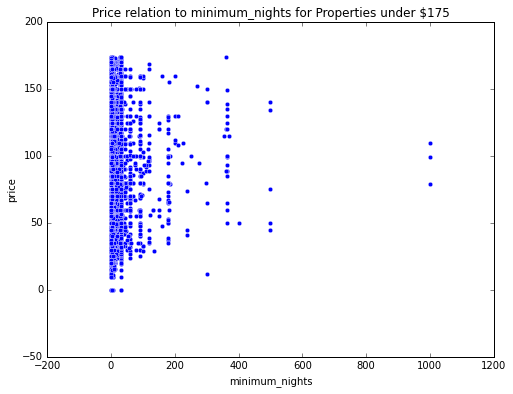

In [106]:
sns.set_palette("muted")
x = 'minimum_nights'
y = 'price'

title = 'Price relation to minimum_nights for Properties under $175'
data_filtered = df.loc[df['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

**Price relation to minimum_nights Properties more than $175**

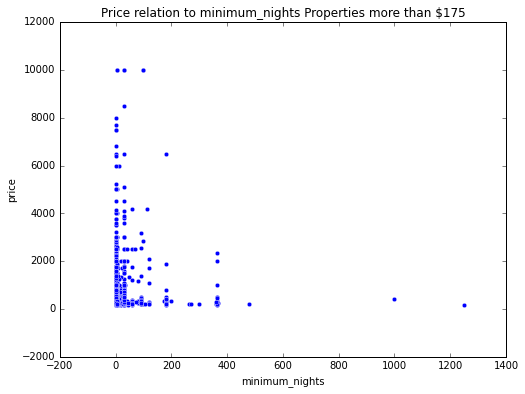

In [107]:
sns.set_palette("muted")
x = 'minimum_nights'
y = 'price'

title = 'Price relation to minimum_nights Properties more than $175'
data_filtered = df.loc[df['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

Above graph shows the relationship between price and minimum_nights